In [31]:
%matplotlib inline
import pandas as pd
import numpy as np
np.random.seed(555)
import matplotlib.pyplot as plt
import bocd

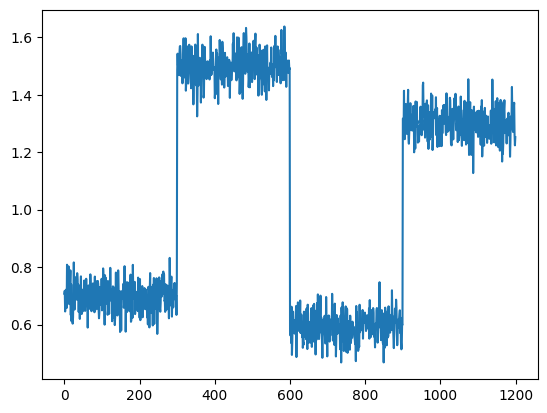

In [11]:
# Generate test data
test_signal = np.concatenate(
    [np.random.normal(0.7, 0.05, 300), 
     np.random.normal(1.5, 0.05, 300),
     np.random.normal(0.6, 0.05, 300),
     np.random.normal(1.3, 0.05, 300)])
plt.plot(test_signal)

/var/folders/q0/tp61rdx579s1pr09fjqsx_gw0000gn/T/ipykernel_84632/1717136186.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rt_mle[i] = bc.rt


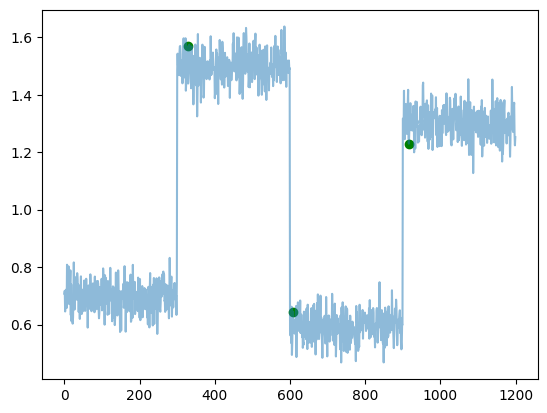

In [19]:
# Initialize object
bc = bocd.BayesianOnlineChangePointDetection(bocd.ConstantHazard(300), bocd.StudentT(mu=0, kappa=1, alpha=1, beta=1))

# Online estimation and get the maximum likelihood r_t at each time point
rt_mle = np.empty(test_signal.shape)
for i, d in enumerate(test_signal):
    bc.update(d)
    rt_mle[i] = bc.rt 
# Plot data with estimated change points
plt.plot(test_signal, alpha=0.5, label="observation")
index_changes = np.where(np.diff(rt_mle)<0)[0]
plt.scatter(index_changes, test_signal[index_changes], c='green', label="change point")

In [7]:
index_changes

array([329, 609, 916])

In [53]:
df

,avg_heart_rate,act_seconds,act_calories,avg_stress
0,77.917355,7770,122,56
1,67.004980,3280,60,28
2,71.544506,12325,394,34
3,71.190337,7705,339,33
4,72.600000,60,0,46
...,...,...,...,...
61,84.267792,24663,1134,37
62,91.182045,14203,780,66
63,78.578984,21439,928,38
64,63.250000,360,0,19


/var/folders/q0/tp61rdx579s1pr09fjqsx_gw0000gn/T/ipykernel_84632/3826876617.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rt_mle[i] = bc.rt


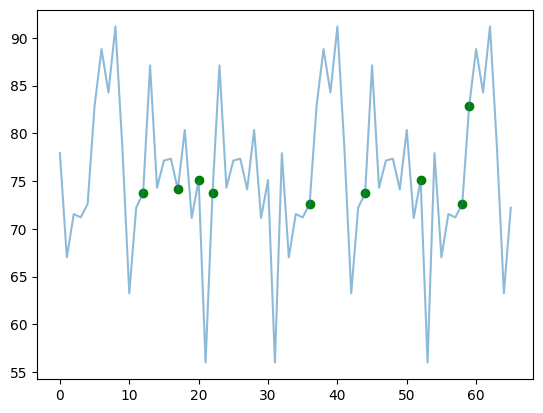

In [51]:
df = pd.read_csv("tracker_data.csv")
l_signal = np.array(df["avg_heart_rate"])

# Initialize object
bc = bocd.BayesianOnlineChangePointDetection(bocd.ConstantHazard(7), bocd.StudentT(mu=0, kappa=1, alpha=1, beta=1))

# Online estimation and get the maximum likelihood r_t at each time point
rt_mle = np.empty(l_signal.shape)
for i, d in enumerate(l_signal):
    bc.update(d)
    rt_mle[i] = bc.rt 
# Plot data with estimated change points
plt.plot(l_signal, alpha=0.5, label="observation")
index_changes = np.where(np.diff(rt_mle)<0)[0]
plt.scatter(index_changes, l_signal[index_changes], c='green', label="change point")

In [52]:
index_changes

array([12, 17, 20, 22, 36, 44, 52, 58, 59])